In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.plot import plot_ofat, plot_ofat_final_step

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# OFAT SA
One Factor at A Time (OFAT or OFaaT) SA is a method of testing the output variance of inputs one at a time. 

First, we run the model 100 times (each 500 steps) with the default parameter settings:
"num_econ_agents": 200, 
"initial_cops": 2, 
"width": 20, 
"height": 20, 
"election_frequency": 70, 
"sentence_length": 20,
"interaction_memory": 50,
"risk_aversion_std": 0.3 to see the distribution

In [2]:
default_data = pd.read_csv('../results/ofat_results_default.csv')

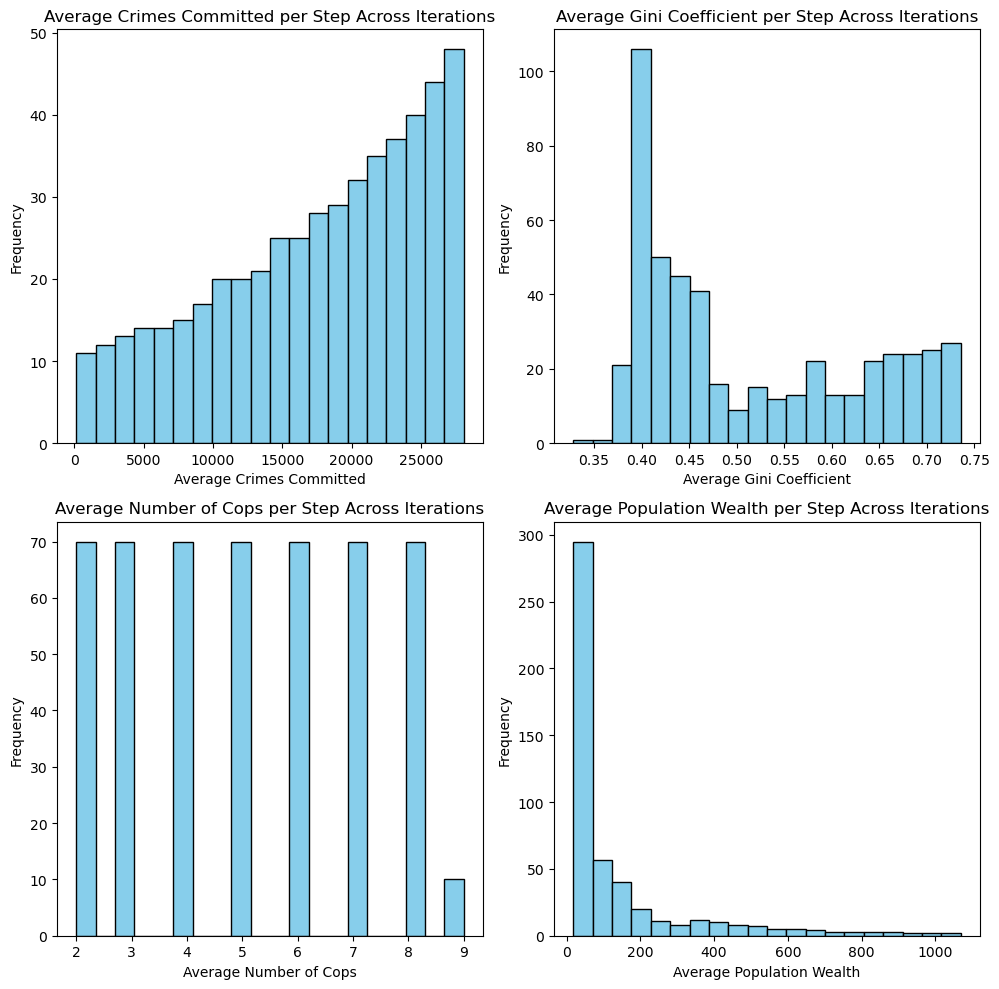

In [3]:
columns_to_plot = ['num_crimes_committed', 'gini_coeff', 'num_cops', 'total_wealth']
labels = {
    'num_crimes_committed': 'Crimes Committed',
    'gini_coeff': 'Gini Coefficient',
    'num_cops': 'Number of Cops',
    'total_wealth': 'Population Wealth'
}

fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the size as needed
axs = axs.ravel()

for i, col in enumerate(columns_to_plot):
    avg_default_data = default_data.groupby(['iteration', 'Step'])[col].mean().reset_index()
    avg_across_iterations = avg_default_data.groupby('Step')[col].mean()
    
    axs[i].hist(avg_across_iterations.dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Average {labels[col]} per Step Across Iterations')
    axs[i].set_xlabel(f'Average {labels[col]}')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
data_at_last_step = default_data[default_data['Step'] == 500]

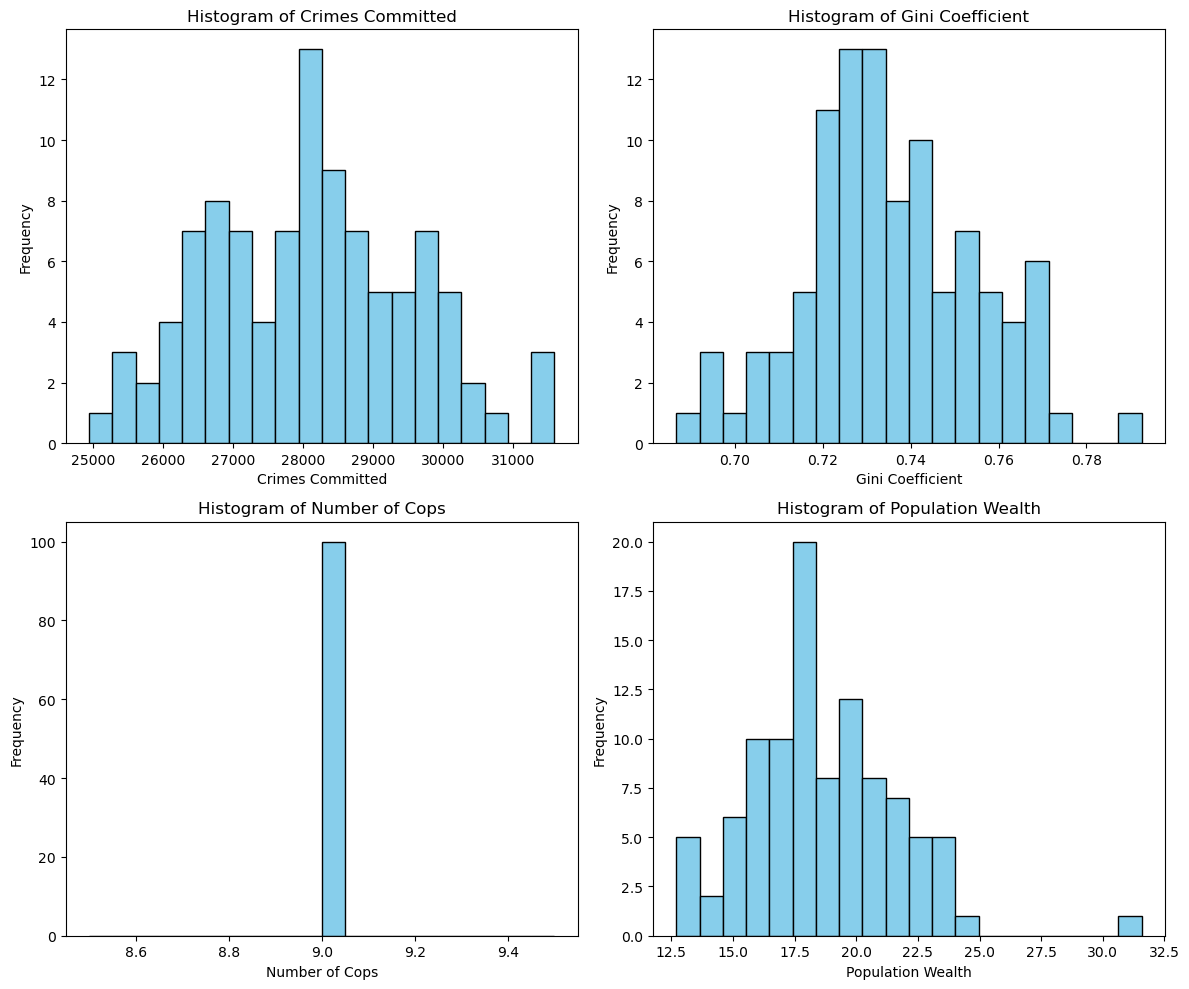

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()  
for i, col in enumerate(columns_to_plot):
    mean_value_at_last_step = data_at_last_step.groupby(['iteration'])[col].mean().reset_index()
    
    # Plot the histogram of the data
    axs[i].hist(mean_value_at_last_step[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of {labels[col]}')
    axs[i].set_xlabel(f'{labels[col]}')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Sentence Length
Analyze how varying sentence length would affect the model outputs

In [3]:
sentence_data = pd.read_csv('../results/ofat_results_vary_sentence.csv')

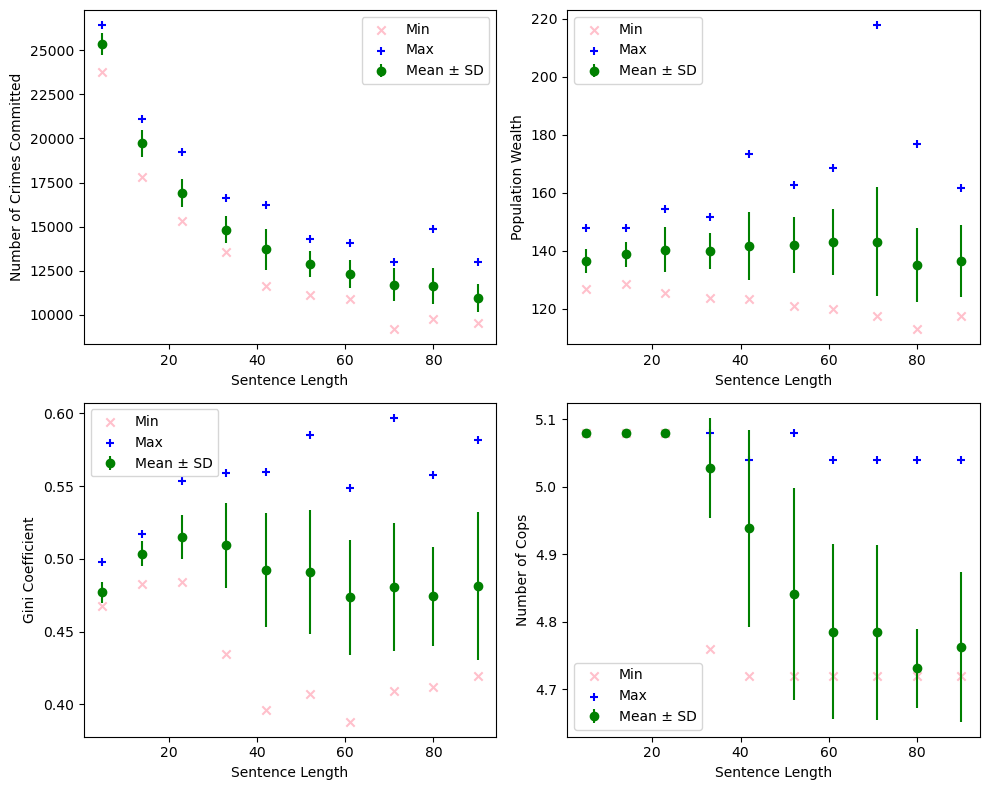

In [6]:

plot_ofat(sentence_data, 'sentence_length')


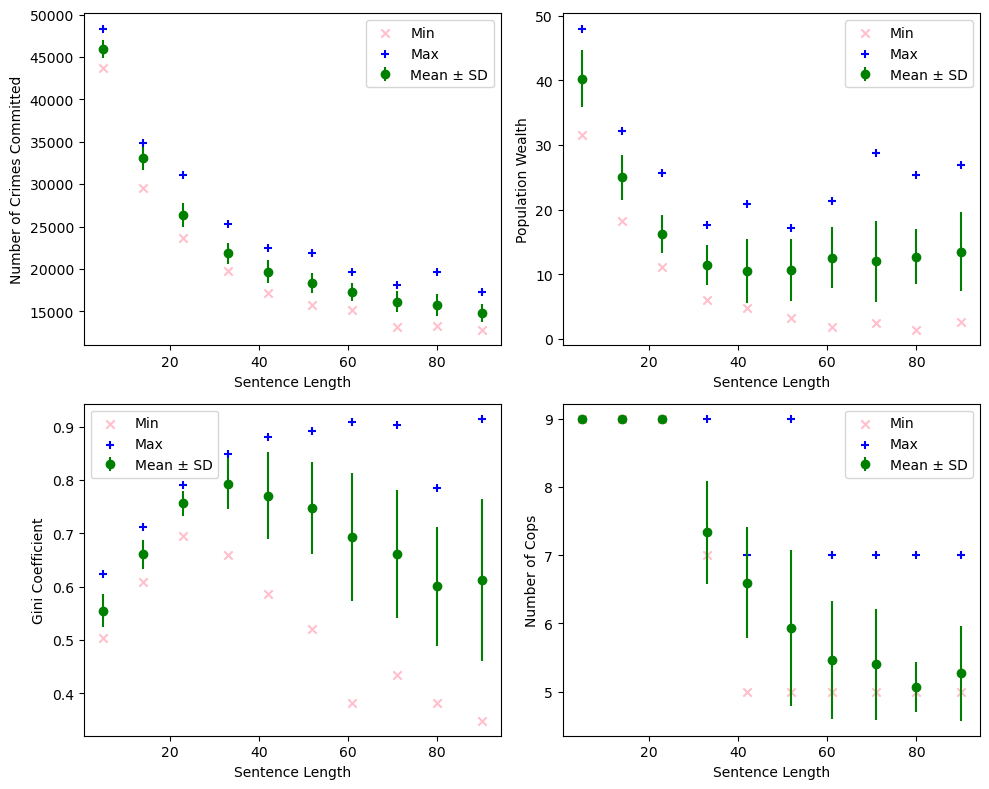

In [4]:
plot_ofat_final_step(sentence_data, 'sentence_length', 500)

### Standard deviation in the distribution of risk aversion
to analyze how homogeneity and diversity in agents' risk profiles would affect the dynamics

In [5]:
risk_data = pd.read_csv('../results/ofat_results_vary_risk.csv')

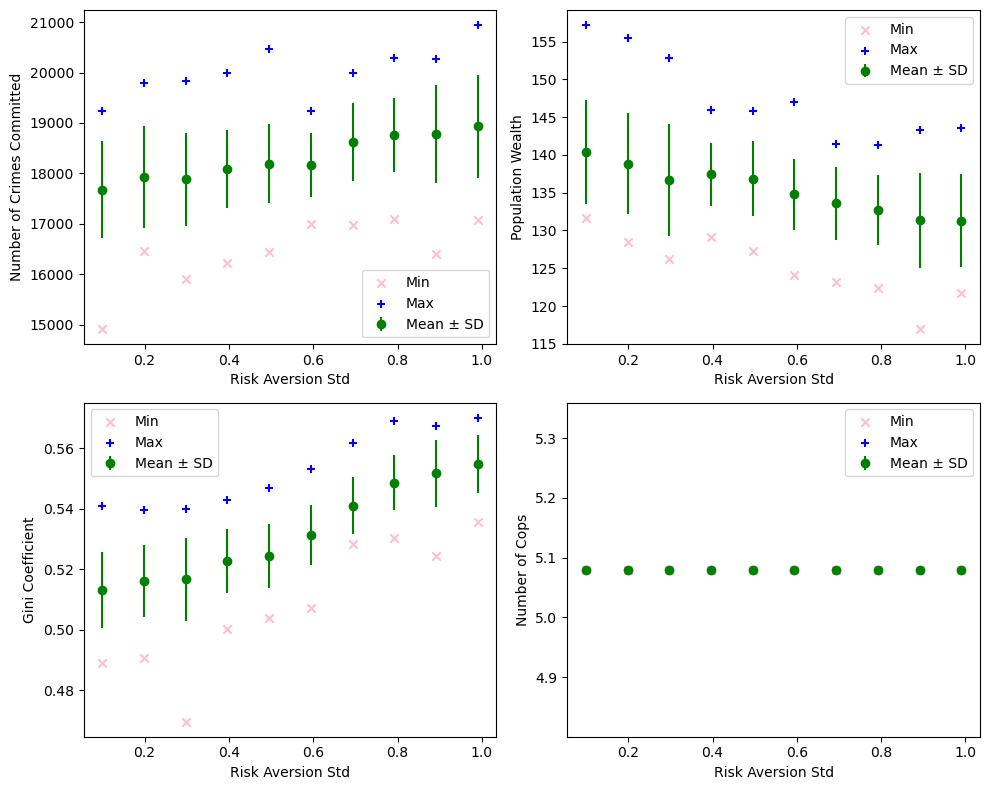

In [7]:
plot_ofat(risk_data, 'risk_aversion_std')

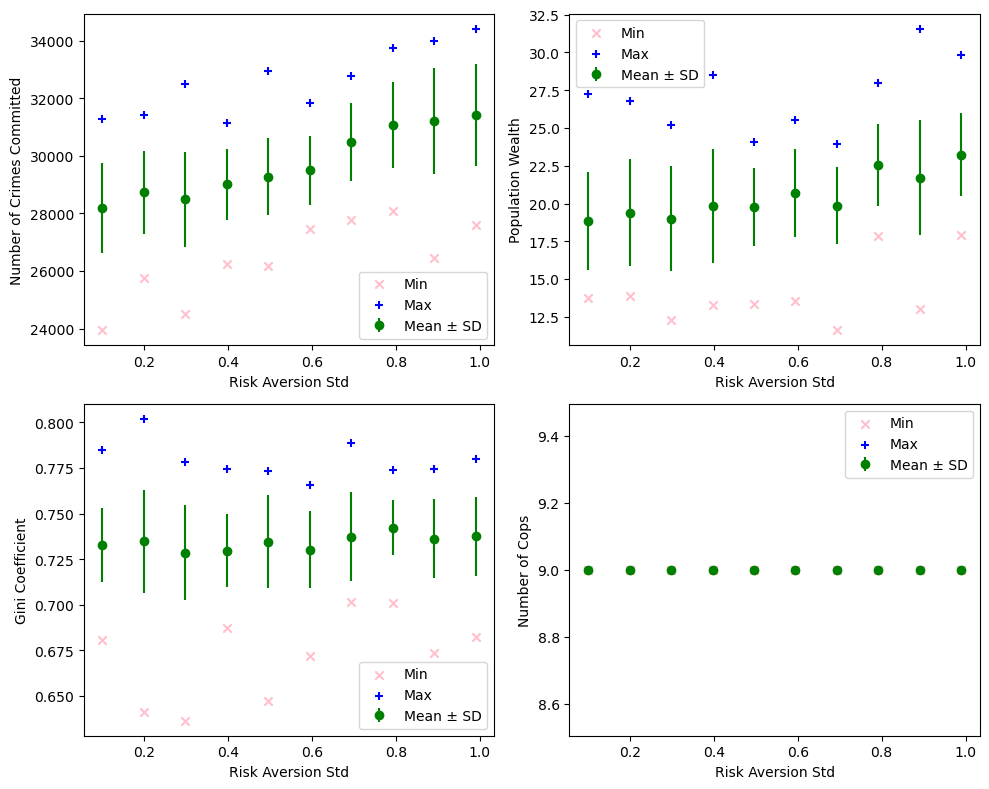

In [6]:
plot_ofat_final_step(risk_data, 'risk_aversion_std', 500)

### Interaction Memory

In [7]:
memory_data = pd.read_csv('../results/ofat_results_vary_memory.csv')

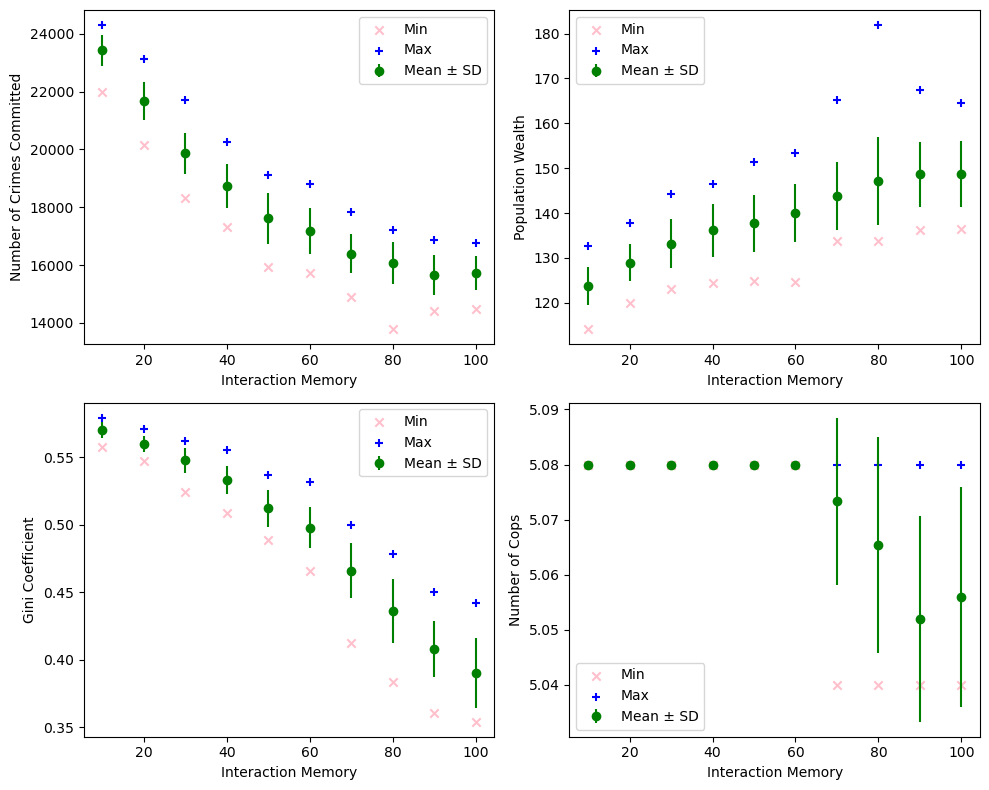

In [8]:
plot_ofat(memory_data, 'interaction_memory')

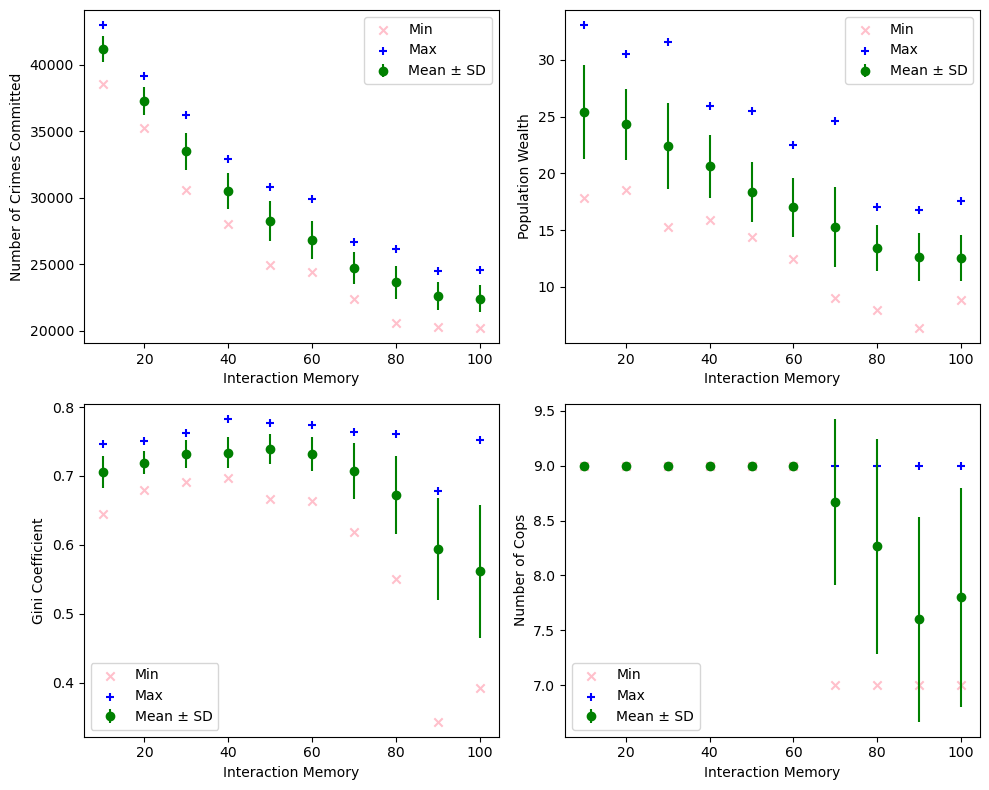

In [8]:
plot_ofat_final_step(memory_data, 'interaction_memory', 500)

### Election Frequency

In [10]:
election_data = pd.read_csv('../results/ofat_results_vary_election.csv')

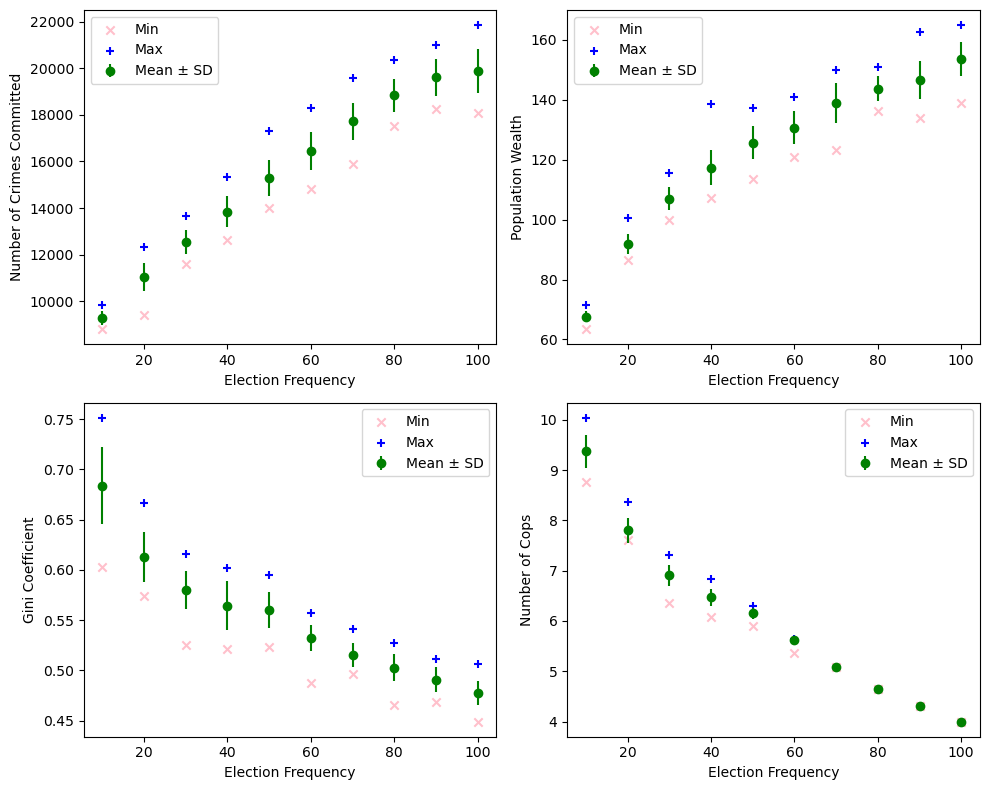

In [9]:
plot_ofat(election_data, 'election_frequency')

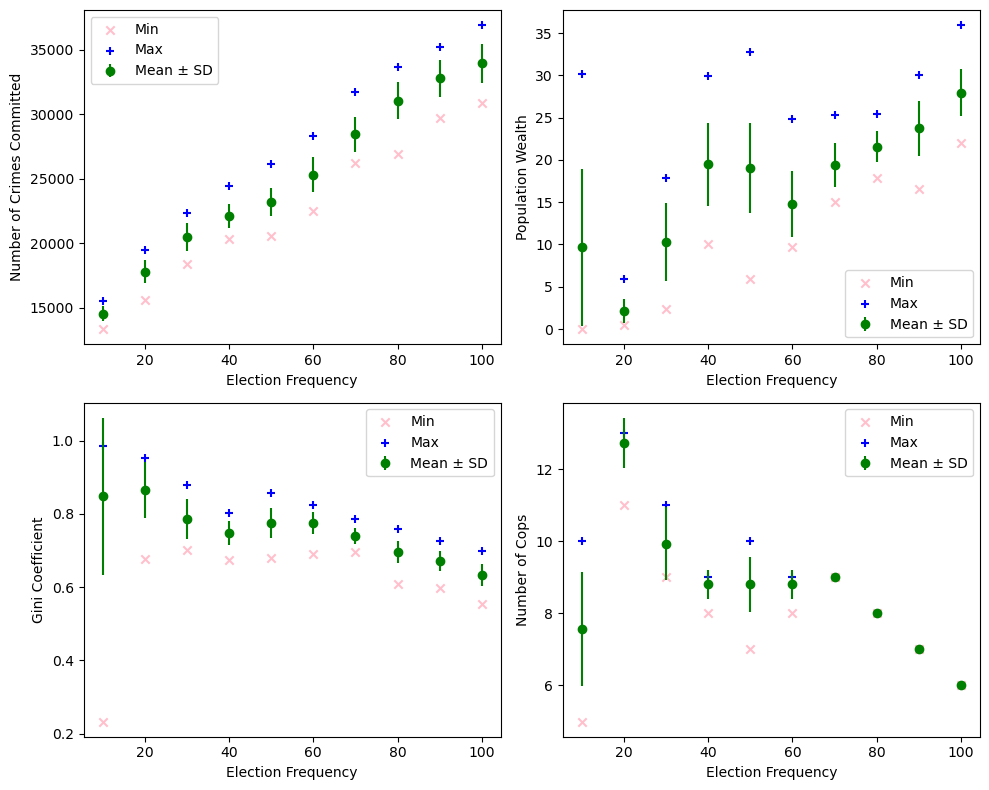

In [11]:
plot_ofat_final_step(election_data, 'election_frequency', 500)